# Timescales in QuTiP
### Andrew M.C. Dawes — 2016
An overview to one frequently asked question about QuTiP.

## Introduction
QuTiP is a python package, if you are new to QuTiP, you should first read the tutorial materials available. If you have used QuTiP but are unsure about timescale and time units, this document will help clarify these concepts.

It is important to note that QuTiP routines do not care what time units you use. There is no *internal* unit of time. Time is defined purely by the units of the other values in your problem, so it is up to you to be careful about units! QuTiP includes a set of solvers for several equations that are relevant to quantum mechanics. Those equations relate various quantities (such as energy and time) and the units of these quantities are constrained only by the equations (i.e. not by QuTiP itself).

$$i \hbar \frac{d}{dt}\left|\psi\right\rangle = H\left|\psi\right\rangle$$

## python imports
We'll use qutip, numpy, matplotlib according to the following import scheme:

In [24]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

It will be useful to define the three components of a spin-1/2 in terms of the Pauli matrices:

In [164]:
Sx = 0.5 * sigmax()
Sy = 0.5 * sigmay()
Sz = 0.5 * sigmaz()

Now the Hamiltonian of a spin-1/2 system in an external magnetic field is $H = \boldsymbol{\omega}_L \cdot \boldsymbol{S}$ where $\boldsymbol{\omega}_L = -\gamma B$ is the Larmor frequency of precession. Here we see our first introduction to units in the system. Either by assumption (following convention) or by derivation, we see that the units of the Hamiltonian are angular frequency. In particular, the equation solved by QuTiP is:

$$i \frac{d}{dt}|\psi\rangle = \omega_L S_Z |\psi\rangle$$

If we make this angular frequency explicit by entering $f = 3$:

$$ H = 2 \pi \cdot 3 \cdot S_z$$

### Hypothesis
We would expect this system to undergo three complete oscillations in one unit of time.

In [165]:
H = 2 * np.pi * 3 * Sz
psi0 = 1/np.sqrt(2)*Qobj([[1],[1]])

In [166]:
times = np.linspace(0,1,50)

In [167]:
result = mesolve(H, psi0, times, [], [Sx, Sy, Sz])
x = result.expect[0]
y = result.expect[1]
z = result.expect[2]

(-1.2, 1.2)

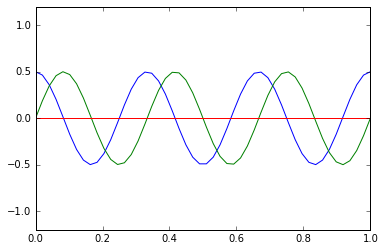

In [168]:
plt.plot(times,x)
plt.plot(times,y)
plt.plot(times,z)

plt.ylim(-1.2,1.2)

### Conclusion
Clearly, the system shows three complete cycles within one time unit. Therefore, time is measured in units of $1/f = 2\pi/\omega_L$.